[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/ANDREWTOLUTAIWO/poor_people_water_consumption/blob/main/PhD%20Thesis%20MLR%20code.ipynb)

### Training, Validation, Testing, Prediction and Evaluation Functions

In [2]:
import numpy as np
import pandas as pd
import math

# Training the model
def training(x1, y1):
    print('TRAINING DATA')
    X_train_prediction = model.predict(x1)
    #Evaluating the trained model
    evaluation(y_train, X_train_prediction)
    
#Validating the model
def validation(x1, y1):
    print('VALIDATION DATA')
    X_valid_prediction = model.predict(x1)
    #Evaluating the validated model
    evaluation(y1, X_valid_prediction)

#Testing the model
def testing(x1, y1):
    print('TESTING DATA')
    X_test_prediction = model.predict(x1)
    #Evaluating the tested model
    evaluation(y1, X_test_prediction)
    

# Predicting with the complete data
def complete_prediction(x1, y1):
    print('COMPLETE DATA')
    X_complete_prediction = model.predict(x1)
    evaluation(y, X_complete_prediction)
    #Convert to dataframe
    pred = pd.DataFrame(X_complete_prediction, columns=['Predicted volume'])
    # Join original data table and pred
    complete_data = pd.DataFrame(pd.concat([data_new, pred], axis=1))
    #Get first 100 records
    data100 = complete_data.iloc[:100]
    #print into excel csv file
    #Complete_Data_With_Prediction = complete_data.to_csv('poor_people_water_data_predicted_february.csv')
    
# Model evaluation with Mean Absolute Error, Root Mean Square Error and Rsquare Score
def evaluation(x, y):
    mae = np.abs(np.subtract(x, np.asarray(y))).mean()
    print('Mean absolute error = ', mae)
    rmse = math.sqrt(np.square(np.subtract(x, y)).mean())
    print('Root mean square error = ', rmse)
    n = (np.subtract(x, x.mean())*np.subtract(y, y.mean())).sum()
    d = math.sqrt(np.square(np.subtract(x, x.mean())).sum()*np.square(np.subtract(y, y.mean())).sum())
    r2s = np.square(n/d)
    print('Rsquare score =', r2s, "\n")

### Pearson Correlation function

In [3]:
# Pearson Correlation
def pearson_correlation(data):
    import matplotlib.pyplot as plt
    import seaborn as sns
    corr = data.corr()
    #Plotting heatmap
    plt.figure(figsize = (10,6))
    return sns.heatmap(corr, annot=True)

<AxesSubplot:>

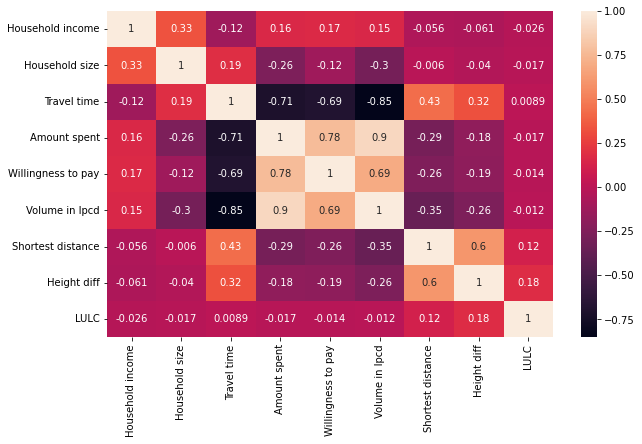

In [4]:
# One-Hot Encoding
data = pd.read_csv("dry_season_data 2.csv")

encoded_data = pd.get_dummies(data, columns = ['Gender', 'Method', 'Availability', 'Quality'])

data_new = pd.DataFrame(encoded_data)

# Loading the data
data_pearson = data_new.drop(columns=['ID', 
            'Education',
            'Rainfall',
            'Ave temp',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Gender_male',
            'Gender_female',
            'Method_delivered',
            'Method_borehole',
            'Method_carried',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_poor',
            'Quality_fair',
            'Quality_good',
            'Quality_very good'], axis=1)

# Testing the feature selection code
pearson_correlation(data_pearson)

### Modelling Multilinear Regression with Selected Featuers

In [5]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# One-Hot Encoding
data = pd.read_csv("dry_season_CONTROL_data 2.csv")

encoded_data = pd.get_dummies(data, columns = ['Gender', 'Method', 'Availability', 'Quality'])

data_new = pd.DataFrame(encoded_data)
# Modeling with Selected Features
X = data_new.drop(columns=['ID', 
            'Education',
            'Rainfall',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Volume in lpcd',
            'Gender_male',
            'Gender_female',
            'Method_delivered',
            'Availability_not_often',
            'Availability_often',
            'Quality_fair',
            'Quality_good',
            'Quality_very good'], axis=1)

y = data_new['Volume in lpcd']

# Splitting data_var into training-validation-test set in ratio 80-10-10
# We first split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

# Now we divide the remaining data equally between valid and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

# Developing the model with Pipeline that infuses StandardScaler with SDGRegressor
model = Pipeline([('scaler', StandardScaler()), ('sgd', SGDRegressor(max_iter=10000, tol=1e-3))])

# Fitting the model
model.fit(X_train, y_train)


#Testing the MLR code
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)

TRAINING DATA
Mean absolute error =  8.731779969944743
Root mean square error =  16.33204787268619
Rsquare score = 0.8294715820722242 

VALIDATION DATA
Mean absolute error =  10.251141690483776
Root mean square error =  17.96770875078441
Rsquare score = 0.7909246579553109 

TESTING DATA
Mean absolute error =  8.700374462259429
Root mean square error =  14.92480006531527
Rsquare score = 0.8337068630280856 

COMPLETE DATA
Mean absolute error =  8.880575591230127
Root mean square error =  16.369100514287137
Rsquare score = 0.8262863127471431 



### Modelling Random  Forest with Selected Features

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# One-Hot Encoding
data = pd.read_csv("dry_season_CONTROL_data 2.csv")

encoded_data = pd.get_dummies(data, columns = ['Gender', 'Method', 'Availability', 'Quality'])

data_new = pd.DataFrame(encoded_data)
# Modeling with Selected Features
X = data_new.drop(columns=['ID', 
            'Education',
            'Rainfall',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Volume in lpcd',
            'Gender_male',
            'Gender_female',
            'Method_delivered',
            'Availability_not_often',
            'Availability_often',
            'Quality_fair',
            'Quality_good',
            'Quality_very good'], axis=1)

y = data_new['Volume in lpcd']

# Splitting data_var into training-validation-test set in ratio 80-10-10
# We first split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

# Now we divide the remaining data equally between valid and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

#Modeling with Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

#Fitting the model
model.fit(X_train, y_train)

# checking the oob score
print('Out of bag score = ', model.oob_score_, '\n')


# Testing the MLP code
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)

Out of bag score =  0.8417225045598393 

TRAINING DATA
Mean absolute error =  6.639125489668794
Root mean square error =  13.094145628880938
Rsquare score = 0.895255472312679 

VALIDATION DATA
Mean absolute error =  5.767595519255525
Root mean square error =  9.659963790620667
Rsquare score = 0.9258882618176739 

TESTING DATA
Mean absolute error =  8.11226342338623
Root mean square error =  16.28111622963252
Rsquare score = 0.7732595293857031 

COMPLETE DATA
Mean absolute error =  6.699286285999199
Root mean square error =  13.153109305869942
Rsquare score = 0.8883957914773292 



## Modelling Support Vector Regression with Selected Features

In [7]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# One-Hot Encoding
data = pd.read_csv("dry_season_CONTROL_data 2.csv")

encoded_data = pd.get_dummies(data, columns = ['Gender', 'Method', 'Availability', 'Quality'])

data_new = pd.DataFrame(encoded_data)
# Modeling with Selected Features
X = data_new.drop(columns=['ID', 
            'Education',
            'Rainfall',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Volume in lpcd',
            'Gender_male',
            'Gender_female',
            'Method_delivered',
            'Availability_not_often',
            'Availability_often',
            'Quality_fair',
            'Quality_good',
            'Quality_very good'], axis=1)

y = data_new['Volume in lpcd']

# Splitting data_var into training-validation-test set in ratio 80-10-10
# We first split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

# Now we divide the remaining data equally between valid and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)


#Modeling with Support Vector Regressor
#model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
model = Pipeline([('scaler', StandardScaler()), ('svr', LinearSVR(C=1.0, epsilon=0.2))])

#Fitting the model
model.fit(X_train, y_train)


# Testing the MLP code
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)

TRAINING DATA
Mean absolute error =  6.4889374625142215
Root mean square error =  16.17813142483044
Rsquare score = 0.8336000727278131 

VALIDATION DATA
Mean absolute error =  7.010823872547956
Root mean square error =  16.53212635590356
Rsquare score = 0.8466167501761778 

TESTING DATA
Mean absolute error =  8.916367230054965
Root mean square error =  23.07800892616412
Rsquare score = 0.6781043073095369 

COMPLETE DATA
Mean absolute error =  6.783869080271652
Root mean square error =  17.028685178358213
Rsquare score = 0.8186745058548209 



## Modelling Multilayer Perceptron ANN with Selected Features

In [8]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# One-Hot Encoding
data = pd.read_csv("dry_season_CONTROL_data 2.csv")

encoded_data = pd.get_dummies(data, columns = ['Gender', 'Method', 'Availability', 'Quality'])

data_new = pd.DataFrame(encoded_data)
# Modeling with Selected Features
X = data_new.drop(columns=['ID', 
            'Education',
            'Rainfall',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Volume in lpcd',
            'Gender_male',
            'Gender_female',
            'Method_delivered',
            'Availability_not_often',
            'Availability_often',
            'Quality_fair',
            'Quality_good',
            'Quality_very good'], axis=1)

y = data_new['Volume in lpcd']

# Splitting data_var into training-validation-test set in ratio 80-10-10
# We first split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

# Now we divide the remaining data equally between valid and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

model = Pipeline([('scaler', StandardScaler()), ('sgd', MLPRegressor(hidden_layer_sizes=(32,),
                   activation="relu", 
                   solver='adam',
                   learning_rate_init=0.01,
                   random_state=1, 
                   warm_start=True,
                   max_iter=2000))])
   
# Fitting the model
model.fit(X_train, y_train)

# Testing the MLP code
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)

TRAINING DATA
Mean absolute error =  8.7264002919682
Root mean square error =  14.62039922617689
Rsquare score = 0.8589675617860104 

VALIDATION DATA
Mean absolute error =  10.54770536243288
Root mean square error =  18.93420399158315
Rsquare score = 0.8091719221827371 

TESTING DATA
Mean absolute error =  11.566416961788237
Root mean square error =  19.213429825264
Rsquare score = 0.7329312556104884 

COMPLETE DATA
Mean absolute error =  9.192532465996686
Root mean square error =  15.613162891315698
Rsquare score = 0.8419278939460251 



### PCA Function

In [10]:
# Principal Component Analysis
def pca(n_components, data1, data2):
    # Scale the data
    from sklearn.preprocessing import StandardScaler
    Xscaled = StandardScaler().fit_transform(data1)
    Xscaled = pd.DataFrame(Xscaled, columns=['ID', 
            'Household income',
            'Education',
            'Household size',
            'Rainfall',
            'Ave temp',
            'Amount spent',
            'Willingness to pay',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Volume in lpcd',
            'Gender_male',
            'Gender_female',
            'Method_carried',
            'Method_delivered',
            'Method_borehole',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_poor',
            'Quality_fair',
            'Quality_good',
            'Quality_very good'])
    
    #print(Xscaled)
    #print into excel csv file
    Xscaled.to_csv('data_new_scaled.csv')
    
    # Getting PCA components
    from sklearn.decomposition import PCA
    pcamodel = PCA(n_components)
    pca = pcamodel.fit_transform(Xscaled)
    global X # Making X global so it can be used elsewhere
    X = pd.DataFrame(pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
    print('Explained Variance ', pcamodel.explained_variance_, "\n")
    print('Explained Variance Ratio ', pcamodel.explained_variance_ratio_, "\n")
   
    #print into excel csv file
    X.to_csv('X_data.csv')
    
    #Explained variance plot
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
    plt.ylabel('Explained variance')
    plt.xlabel('Components')
    plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
    plt.legend(loc='upper left')
    plt.show()
       
    #Explained Variance ratio plot
    plt.plot(pcamodel.explained_variance_ratio_)
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    
    # Heatmap showing effect of variables on each component
    # Scale the data
    from sklearn.preprocessing import StandardScaler
    Xscaled2 = StandardScaler().fit_transform(data2)
    Xscaled2 = pd.DataFrame(Xscaled2, columns=['Household income',
            'Household size',
            'Rainfall',
            'Ave temp',
            'Amount spent',
            'Willingness to pay',
            'Volume in lpcd'])
    # Getting PCA components
    from sklearn.decomposition import PCA
    pcamodel2 = PCA(n_components)
    pca2 = pcamodel2.fit_transform(Xscaled2)
    
    ax = sns.heatmap(pcamodel2.components_,
                 cmap='Spectral',
                 yticklabels=[ "PC"+str(x) for x in range(1,pcamodel2.n_components_+1)],
                 xticklabels=list(data_new2.columns),
                 cbar_kws={"orientation": "vertical"}, annot=True)
    ax.set_aspect("equal")


### Multilinear Modeling with PCA

Explained Variance  [2.83584995 2.10325321 2.01812201 1.95077254 1.8447072  1.51355161
 1.35498444] 

Explained Variance Ratio  [0.14913088 0.11060529 0.10612843 0.10258668 0.09700894 0.07959423
 0.07125554] 



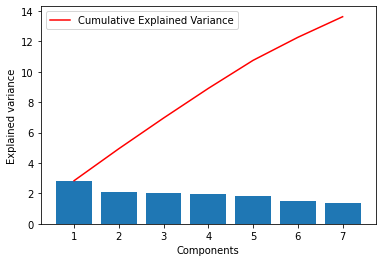

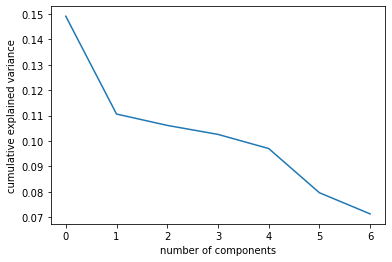

TRAINING DATA
Mean absolute error =  9.146770785372953
Root mean square error =  13.371250080248483
Rsquare score = 0.8877314441544119 

VALIDATION DATA
Mean absolute error =  9.384612777352123
Root mean square error =  14.574006033182078
Rsquare score = 0.8501902876721364 

TESTING DATA
Mean absolute error =  9.786626361827748
Root mean square error =  14.769644842429724
Rsquare score = 0.8502350439924933 

COMPLETE DATA
Mean absolute error =  9.234540542216347
Root mean square error =  13.641358767714815
Rsquare score = 0.8797255075486827 



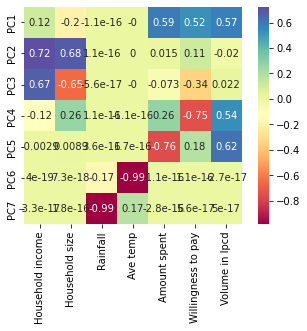

In [11]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# One-Hot Encoding
data = pd.read_csv("dry_season_data 2.csv")

encoded_data = pd.get_dummies(data, columns = ['Gender', 'Method', 'Availability', 'Quality'])

data_new = pd.DataFrame(encoded_data)

data_new = data_new.drop(columns=['Travel time',
            'Shortest distance',
            'Height diff',
            'LULC'], axis=1)

data_new2 = data_new.drop(columns=['ID',
            'Education',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Gender_male',
            'Gender_female',
            'Method_carried',
            'Method_delivered',
            'Method_borehole',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_poor',
            'Quality_fair',
            'Quality_good',
            'Quality_very good'], axis=1)

#Testing the PCA code
pca(7, data_new, data_new2)

# Modeling with the Extracted Features
#Separate target variable from input variables
X    # X is the global variable from function pca; it is dataframe of the extracted PCs
y = data_new['Volume in lpcd']

# Splitting data_var into training-validation-test set in ratio 80-10-10
# We first split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

# Now we divide the remaining data equally between valid and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

# Developing the model with Pipeline that infuses StandardScaler with SDGRegressor
model = Pipeline([('scaler', StandardScaler()), ('sgd', SGDRegressor(max_iter=10000, tol=1e-3))])

#Fitting the model
model.fit(X_train, y_train)
   

#Testing the MLR code
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)

### Random Forest Modelling with PCA

Explained Variance  [2.83584995 2.10325321 2.01812201 1.95077254 1.8447072  1.51355161
 1.35498444] 

Explained Variance Ratio  [0.14913088 0.11060529 0.10612843 0.10258668 0.09700894 0.07959423
 0.07125554] 



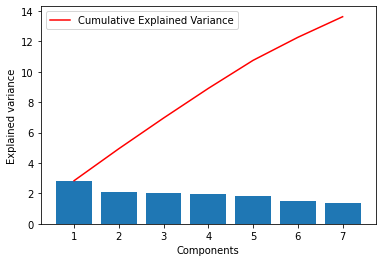

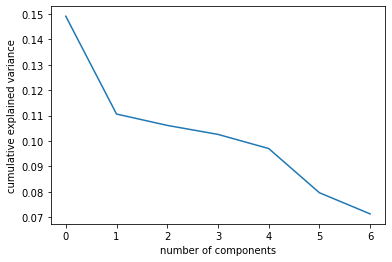

Out of bag score =  0.8806525732073948 

TRAINING DATA
Mean absolute error =  7.212681183649371
Root mean square error =  10.51312346675553
Rsquare score = 0.928125125332711 

VALIDATION DATA
Mean absolute error =  8.917114645321108
Root mean square error =  14.08293449913269
Rsquare score = 0.897143243435207 

TESTING DATA
Mean absolute error =  8.925675735297325
Root mean square error =  14.402288331669334
Rsquare score = 0.8687276555417874 

COMPLETE DATA
Mean absolute error =  7.5544239849813355
Root mean square error =  11.357645326005585
Rsquare score = 0.918202317822615 



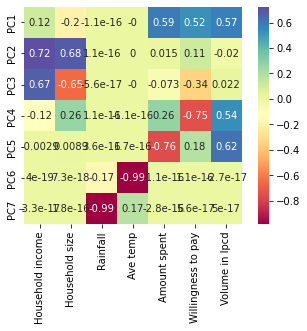

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# One-Hot Encoding
data = pd.read_csv("wet_season_data 2.csv")

encoded_data = pd.get_dummies(data, columns = ['Gender', 'Method', 'Availability', 'Quality'])

data_new = pd.DataFrame(encoded_data)

data_new = data_new.drop(columns=['Travel time',
            'Shortest distance',
            'Height diff',
            'LULC'], axis=1)

data_new2 = data_new.drop(columns=['ID',
            'Education',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Gender_male',
            'Gender_female',
            'Method_carried',
            'Method_delivered',
            'Method_borehole',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_poor',
            'Quality_fair',
            'Quality_good',
            'Quality_very good'], axis=1)

#Testing the PCA code
pca(7, data_new, data_new2)

# Modeling with the Extracted Features
#Separate target variable from input variables
X    # X is the global variable from function pca; it is dataframe of the extracted PCs
y = data_new['Volume in lpcd']

# Splitting data_var into training-validation-test set in ratio 80-10-10
# We first split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

# Now we divide the remaining data equally between valid and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

#Modeling with Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

#Fitting the model
model.fit(X_train, y_train)

# checking the oob score
print('Out of bag score = ', model.oob_score_, '\n')


# Testing the MLP code
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)

## Support Vector Regression with PCA

Explained Variance  [2.83584995 2.10325321 2.01812201 1.95077254 1.8447072  1.51355161
 1.35498444] 

Explained Variance Ratio  [0.14913088 0.11060529 0.10612843 0.10258668 0.09700894 0.07959423
 0.07125554] 



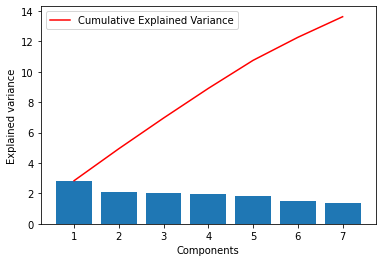

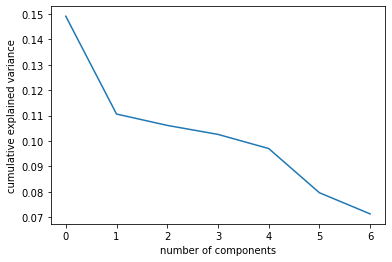

TRAINING DATA
Mean absolute error =  8.354955073780596
Root mean square error =  14.37837339751881
Rsquare score = 0.8786387458236651 

VALIDATION DATA
Mean absolute error =  10.390177013044214
Root mean square error =  16.682457599004653
Rsquare score = 0.8889161207734688 

TESTING DATA
Mean absolute error =  8.26315256467491
Root mean square error =  13.20496937285748
Rsquare score = 0.8320919988134601 

COMPLETE DATA
Mean absolute error =  8.549297016796412
Root mean square error =  14.51405036558887
Rsquare score = 0.8766691660764085 



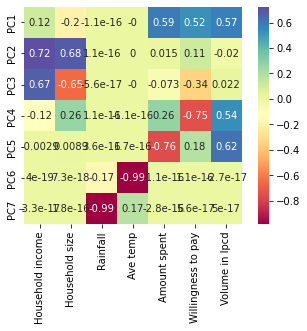

In [13]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# One-Hot Encoding
data = pd.read_csv("wet_season_data 2.csv")

encoded_data = pd.get_dummies(data, columns = ['Gender', 'Method', 'Availability', 'Quality'])

data_new = pd.DataFrame(encoded_data)

data_new = data_new.drop(columns=['Travel time',
            'Shortest distance',
            'Height diff',
            'LULC'], axis=1)

data_new2 = data_new.drop(columns=['ID',
            'Education',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Gender_male',
            'Gender_female',
            'Method_carried',
            'Method_delivered',
            'Method_borehole',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_poor',
            'Quality_fair',
            'Quality_good',
            'Quality_very good'], axis=1)

#Testing the PCA code
pca(7, data_new, data_new2)

# Modeling with the Extracted Features
#Separate target variable from input variables
X    # X is the global variable from function pca; it is dataframe of the extracted PCs
y = data_new['Volume in lpcd']

# Splitting data_var into training-validation-test set in ratio 80-10-10
# We first split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

# Now we divide the remaining data equally between valid and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)


#Modeling with Support Vector Regressor
#model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
model = Pipeline([('scaler', StandardScaler()), ('svr', LinearSVR(C=1.0, epsilon=0.2))])

#Fitting the model
model.fit(X_train, y_train)


# Testing the MLP code
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)

## Multilayer Perceptron ANN with PCA

Explained Variance  [2.83584995 2.10325321 2.01812201 1.95077254 1.8447072  1.51355161
 1.35498444] 

Explained Variance Ratio  [0.14913088 0.11060529 0.10612843 0.10258668 0.09700894 0.07959423
 0.07125554] 



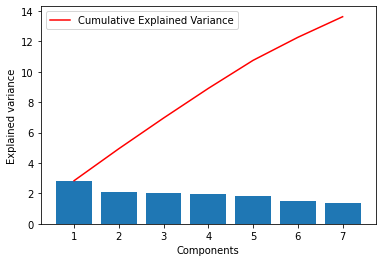

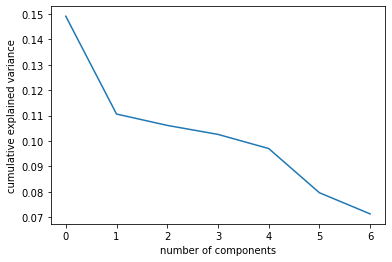

TRAINING DATA
Mean absolute error =  8.468752390867051
Root mean square error =  12.612303042957851
Rsquare score = 0.9002604832514856 

VALIDATION DATA
Mean absolute error =  8.501473705603283
Root mean square error =  11.886376126186073
Rsquare score = 0.8953365116142993 

TESTING DATA
Mean absolute error =  9.371134642622604
Root mean square error =  12.846207098647886
Rsquare score = 0.8778483726819444 

COMPLETE DATA
Mean absolute error =  8.562262747516229
Root mean square error =  12.565319250276726
Rsquare score = 0.8976252868308121 



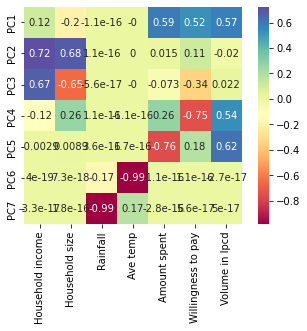

In [14]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# One-Hot Encoding
data = pd.read_csv("wet_season_data 2.csv")

encoded_data = pd.get_dummies(data, columns = ['Gender', 'Method', 'Availability', 'Quality'])

data_new = pd.DataFrame(encoded_data)

data_new = data_new.drop(columns=['Travel time',
            'Shortest distance',
            'Height diff',
            'LULC'], axis=1)

data_new2 = data_new.drop(columns=['ID',
            'Education',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Gender_male',
            'Gender_female',
            'Method_carried',
            'Method_delivered',
            'Method_borehole',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_poor',
            'Quality_fair',
            'Quality_good',
            'Quality_very good'], axis=1)

#Testing the PCA code
pca(7, data_new, data_new2)

# Modeling with the Extracted Features
#Separate target variable from input variables
X    # X is the global variable from function pca; it is dataframe of the extracted PCs
y = data_new['Volume in lpcd']

# Splitting data_var into training-validation-test set in ratio 80-10-10
# We first split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

# Now we divide the remaining data equally between valid and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

model = Pipeline([('scaler', StandardScaler()), ('sgd', MLPRegressor(hidden_layer_sizes=(32,),
                   activation="relu", 
                   solver='adam',
                   learning_rate_init=0.01,
                   random_state=1, 
                   warm_start=True,
                   max_iter=2000))])
   
# Fitting the model
model.fit(X_train, y_train)

# Testing the MLP code
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)